# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

#### Analyis
Observed Trends
1.  
2.  
3.  

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

619

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Build dataframe using list cities generated in above steps 
weather_df = pd.DataFrame({"City" : cities,
                         "Lat" : "",
                         "Lng" : "",
                         "Max Temp" : "",
                         "Humidity" : "",
                         "Cloudiness" : "",
                         "Wind Speed" : "",
                         "Date" : ""})

In [4]:
# https://openweathermap.org/current#name
base_url = "https://api.openweathermap.org/data/2.5/weather?"

print('Beginning Data Retrieval')     
print('-----------------------------')

# Loop through the number of cities
for x in range(len(cities)):
               
    city = cities[x]
    units = "imperial"
    url = f"{base_url}q={city}&appid={weather_api_key}&units={units}"
    
    # call API for each city and add data to dataframe if data is available
    try: 
        weather_data = requests.get(url).json()
    
        weather_df.loc[weather_df['City'] == city, 'Lat'] = weather_data['coord']['lat']
        weather_df.loc[weather_df['City'] == city, 'Lng'] = weather_data['coord']['lon']
        weather_df.loc[weather_df['City'] == city, 'Max Temp'] = weather_data['main']['temp_max']
        weather_df.loc[weather_df['City'] == city, 'Humidity'] = weather_data['main']['humidity']
        weather_df.loc[weather_df['City'] == city, 'Cloudiness'] = weather_data['clouds']['all']
        weather_df.loc[weather_df['City'] == city, 'Wind Speed'] = weather_data['wind']['speed']
        weather_df.loc[weather_df['City'] == city, 'Country'] = weather_data['sys']['country']
        weather_df.loc[weather_df['City'] == city, 'Date'] = weather_data['dt']
        
        print(f'Processing Record {x+1} | {city} ')
    except:
        print('City not found. Skipping...')

Beginning Data Retrieval
-----------------------------
Processing Record 1 | canico 
Processing Record 2 | barrow 
Processing Record 3 | rikitea 
Processing Record 4 | taltal 
City not found. Skipping...
Processing Record 6 | cape town 
Processing Record 7 | bethel 
Processing Record 8 | nantucket 
Processing Record 9 | haines junction 
Processing Record 10 | punta arenas 
Processing Record 11 | coquimbo 
Processing Record 12 | ola 
Processing Record 13 | mar del plata 
Processing Record 14 | klaksvik 
Processing Record 15 | hermanus 
Processing Record 16 | guerrero negro 
Processing Record 17 | arraial do cabo 
Processing Record 18 | ponta do sol 
Processing Record 19 | port alfred 
Processing Record 20 | ust-tsilma 
Processing Record 21 | vigrestad 
Processing Record 22 | butaritari 
Processing Record 23 | ilulissat 
Processing Record 24 | cherskiy 
City not found. Skipping...
Processing Record 26 | katherine 
Processing Record 27 | yellowknife 
Processing Record 28 | castro 
Process

Processing Record 245 | sungaipenuh 
Processing Record 246 | praia da vitoria 
Processing Record 247 | kieta 
Processing Record 248 | portland 
Processing Record 249 | xuddur 
Processing Record 250 | keti bandar 
Processing Record 251 | koulikoro 
Processing Record 252 | kembe 
Processing Record 253 | krasnoselkup 
Processing Record 254 | wieliczka 
Processing Record 255 | constitucion 
Processing Record 256 | yining 
Processing Record 257 | salalah 
Processing Record 258 | namtsy 
Processing Record 259 | sitka 
Processing Record 260 | sarangani 
Processing Record 261 | iskateley 
Processing Record 262 | belmonte 
Processing Record 263 | walvis bay 
Processing Record 264 | ust-nera 
City not found. Skipping...
Processing Record 266 | manzhouli 
Processing Record 267 | komsomolskiy 
Processing Record 268 | winslow 
Processing Record 269 | camacha 
Processing Record 270 | san patricio 
Processing Record 271 | barcelos 
Processing Record 272 | atar 
Processing Record 273 | junqueiro 
Proc

Processing Record 490 | dalvik 
Processing Record 491 | avera 
City not found. Skipping...
City not found. Skipping...
Processing Record 494 | ratnagiri 
Processing Record 495 | west haven 
Processing Record 496 | fortuna 
Processing Record 497 | yazd 
Processing Record 498 | sakaraha 
Processing Record 499 | virginia beach 
City not found. Skipping...
Processing Record 501 | neuquen 
Processing Record 502 | tarakan 
Processing Record 503 | comodoro rivadavia 
Processing Record 504 | coruripe 
Processing Record 505 | aquiraz 
City not found. Skipping...
Processing Record 507 | lerwick 
City not found. Skipping...
Processing Record 509 | esterhazy 
Processing Record 510 | redmond 
Processing Record 511 | enid 
Processing Record 512 | aljezur 
Processing Record 513 | dwarka 
Processing Record 514 | tateyama 
Processing Record 515 | chunoyar 
Processing Record 516 | pochutla 
Processing Record 517 | udachnyy 
City not found. Skipping...
Processing Record 519 | sladkovo 
Processing Record 

In [5]:
# Check counts for each variable to see if there are NaN or missing values
weather_df.count()

City          619
Lat           619
Lng           619
Max Temp      619
Humidity      619
Cloudiness    619
Wind Speed    619
Date          619
Country       570
dtype: int64

In [6]:
# Drop missing values
weather_df.dropna(inplace=True)

# Reset index to adjust for NaN values that were removed 
weather_df.reset_index(drop=True,inplace=True)

In [7]:
# Failsafe to keep the number of cities under 600 for purposes of not testing API call limits
weather_df = weather_df[weather_df.index < 600]

In [8]:
# Change datatypes for numeric data 
weather_df[['Lat','Lng','Max Temp','Wind Speed']] = weather_df[['Lat','Lng',
                                                                'Max Temp',
                                                                'Wind Speed']].astype(float)
weather_df[['Humidity','Cloudiness']] = weather_df[['Humidity','Cloudiness']].astype(int)

In [9]:
# Check variable counts
weather_df.count()

City          570
Lat           570
Lng           570
Max Temp      570
Humidity      570
Cloudiness    570
Wind Speed    570
Date          570
Country       570
dtype: int64

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [28]:
# Export to csv
weather_df.to_csv('output_data/city_weather_data.csv')

In [11]:
# View snapshot of dataframe
weather_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date,Country
0,canico,32.6333,-16.8500,72.23,43,20,16.11,1650148882,PT
1,barrow,71.2906,-156.7887,6.82,72,0,21.85,1650148686,US
2,rikitea,-23.1203,-134.9692,78.49,70,7,13.67,1650148883,PF
3,taltal,-25.4000,-70.4833,62.49,77,22,5.86,1650148883,CL
4,cape town,-33.9258,18.4232,59.92,70,0,15.01,1650148715,ZA


In [12]:
weather_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
count,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000
mean,20.292122,18.305827,59.072175,71.057895,59.140351,8.385965
std,33.514298,91.278689,21.716914,21.336499,38.237321,5.690638
min,-54.800000,-175.200000,-15.540000,1.000000,0.000000,0.000000
25%,-7.683225,-61.764900,44.500000,61.000000,20.000000,4.082500
50%,24.832250,18.996650,63.535000,76.500000,73.000000,7.000000
75%,48.557625,104.247400,77.332500,87.000000,99.000000,11.500000
max,78.218600,179.316700,100.690000,100.000000,100.000000,34.520000


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [13]:
# Collect cities with humidity over 100%
humid_cities = weather_df[weather_df['Humidity'] > 100]
humid_cities

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date,Country


In [15]:
# Create copy of dataframe
clean_city_data = pd.DataFrame(weather_df).copy()

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs in the output_data folder
* Below are examples of what you should get but your results will be different.

## Latitude vs. Temperature Plot

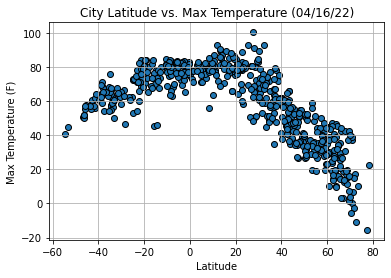

In [29]:
# Set x and y axis
x_axis = clean_city_data['Lat']
y_axis = clean_city_data['Max Temp']

# Plot scatterplot, add labels and titles
plt.xlabel('Latitude');
plt.ylabel('Max Temperature (F)');
plt.title('City Latitude vs. Max Temperature (04/16/22)');
plt.grid();
plt.scatter(x_axis,y_axis,edgecolors='black');

# Save figure
plt.savefig('output_data/04-16-22_lat_max_temp.png')

## Latitude vs. Humidity Plot

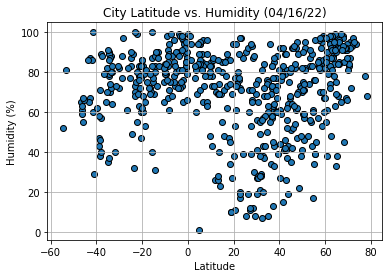

In [30]:
# Set x and y axis
x_axis = clean_city_data['Lat']
y_axis = clean_city_data['Humidity']

# Plot scatterplot, add labels and titles
plt.xlabel('Latitude');
plt.ylabel('Humidity (%)');
plt.title('City Latitude vs. Humidity (04/16/22)');
plt.grid();
plt.scatter(x_axis,y_axis,edgecolors='black');

# Save figure
plt.savefig('output_data/04-16-22_lat_humidity.png')

## Latitude vs. Cloudiness Plot

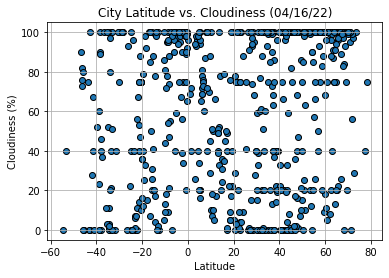

In [31]:
# Set x and y axis
x_axis = clean_city_data['Lat']
y_axis = clean_city_data['Cloudiness']

# Plot scatterplot, add labels and titles
plt.xlabel('Latitude');
plt.ylabel('Cloudiness (%)');
plt.title('City Latitude vs. Cloudiness (04/16/22)');
plt.grid();
plt.scatter(x_axis,y_axis,edgecolors='black');

# Save figure
plt.savefig('output_data/04-16-22_lat_cloudiness.png')

## Latitude vs. Wind Speed Plot

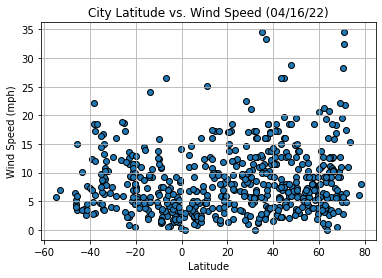

In [32]:
# Set x and y axis
x_axis = clean_city_data['Lat']
y_axis = clean_city_data['Wind Speed']

# Plot scatterplot, add labels and titles
plt.xlabel('Latitude');
plt.ylabel('Wind Speed (mph)');
plt.title('City Latitude vs. Wind Speed (04/16/22)');
plt.grid();
plt.scatter(x_axis,y_axis,edgecolors='black');

# Save figure
plt.savefig('output_data/04-16-22_lat_wind_speed.png')

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

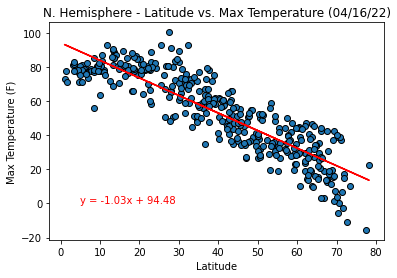

In [63]:
# Set x and y axis, restricting to northern hemisphere
x_axis = clean_city_data.loc[clean_city_data['Lat'] >= 0,'Lat']
y_axis = clean_city_data.loc[clean_city_data['Lat'] >= 0,'Max Temp']

# Perform regression
(slope,intercept,rvalue,pvalue,stderr) = linregress(x_axis,y_axis)
line_eq = slope * x_axis + intercept 
line_label = f"y = {round(slope,2)}x + {round(intercept,2)}"

# Plot scatterplot and superimpose regression line
plt.scatter(x_axis,y_axis,edgecolors='black');
plt.plot(x_axis,line_eq,color='red');
plt.title('N. Hemisphere - Latitude vs. Max Temperature (04/16/22)');
plt.annotate(line_label,(5,0),color='red');
plt.xlabel('Latitude');
plt.ylabel('Max Temperature (F)');

# Save figure
plt.savefig('output_data/04-16-22_nhemisphere_max_temp.png')

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

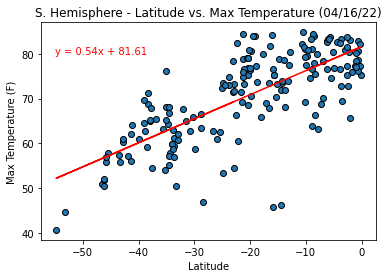

In [64]:
# Set x and y axis, restricting to southern hemisphere
x_axis = clean_city_data.loc[clean_city_data['Lat'] < 0,'Lat']
y_axis = clean_city_data.loc[clean_city_data['Lat'] < 0,'Max Temp']

# Perform regression
(slope,intercept,rvalue,pvalue,stderr) = linregress(x_axis,y_axis)
line_eq = slope * x_axis + intercept 
line_label = f"y = {round(slope,2)}x + {round(intercept,2)}"

# Plot scatterplot and superimpose regression line
plt.scatter(x_axis,y_axis,edgecolors='black');
plt.plot(x_axis,line_eq,color='red');
plt.title('S. Hemisphere - Latitude vs. Max Temperature (04/16/22)');
plt.annotate(line_label,(-55,80),color='red');
plt.xlabel('Latitude');
plt.ylabel('Max Temperature (F)');

# Save figure
plt.savefig('output_data/04-16-22_shemisphere_max_temp.png')

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

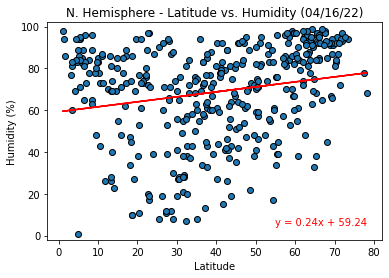

In [65]:
# Set x and y axis, restricting to northern hemisphere
x_axis = clean_city_data.loc[clean_city_data['Lat'] >= 0,'Lat']
y_axis = clean_city_data.loc[clean_city_data['Lat'] >= 0,'Humidity']

# Perform regression
(slope,intercept,rvalue,pvalue,stderr) = linregress(x_axis,y_axis)
line_eq = slope * x_axis + intercept 
line_label = f"y = {round(slope,2)}x + {round(intercept,2)}"

# Plot scatterplot and superimpose regression line
plt.scatter(x_axis,y_axis,edgecolors='black');
plt.plot(x_axis,line_eq,color='red');
plt.title('N. Hemisphere - Latitude vs. Humidity (04/16/22)');
plt.annotate(line_label,(55,5),color='red');
plt.xlabel('Latitude');
plt.ylabel('Humidity (%)');
plt.ylim(-2,102);

# Save figure
plt.savefig('output_data/04-16-22_nhemisphere_humidity.png')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

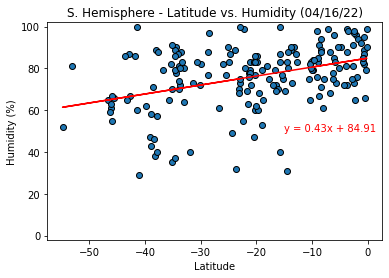

In [66]:
# Set x and y axis, restricting to southern hemisphere
x_axis = clean_city_data.loc[clean_city_data['Lat'] < 0,'Lat']
y_axis = clean_city_data.loc[clean_city_data['Lat'] < 0,'Humidity']

# Perform regression
(slope,intercept,rvalue,pvalue,stderr) = linregress(x_axis,y_axis)
line_eq = slope * x_axis + intercept 
line_label = f"y = {round(slope,2)}x + {round(intercept,2)}"

# Plot scatterplot and superimpose regression line
plt.scatter(x_axis,y_axis,edgecolors='black');
plt.plot(x_axis,line_eq,color='red');
plt.title('S. Hemisphere - Latitude vs. Humidity (04/16/22)');
plt.annotate(line_label,(-15,50),color='red');
plt.xlabel('Latitude');
plt.ylabel('Humidity (%)');
plt.ylim(-2,102);

# Save figure
plt.savefig('output_data/04-16-22_shemisphere_humidity.png')

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

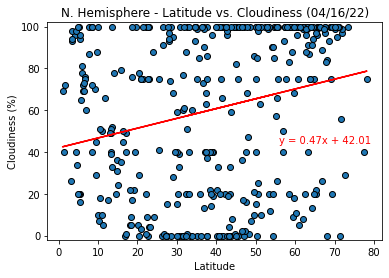

In [67]:
# Set x and y axis, restricting to northern hemisphere
x_axis = clean_city_data.loc[clean_city_data['Lat'] >= 0,'Lat']
y_axis = clean_city_data.loc[clean_city_data['Lat'] >= 0,'Cloudiness']

# Perform regression
(slope,intercept,rvalue,pvalue,stderr) = linregress(x_axis,y_axis)
line_eq = slope * x_axis + intercept 
line_label = f"y = {round(slope,2)}x + {round(intercept,2)}"

# Plot scatterplot and superimpose regression line
plt.scatter(x_axis,y_axis,edgecolors='black');
plt.plot(x_axis,line_eq,color='red');
plt.title('N. Hemisphere - Latitude vs. Cloudiness (04/16/22)');
plt.annotate(line_label,(56,44),color='red');
plt.xlabel('Latitude');
plt.ylabel('Cloudiness (%)');
plt.ylim(-2,102);

# Save figure
plt.savefig('output_data/04-16-22_nhemisphere_cloudiness.png')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

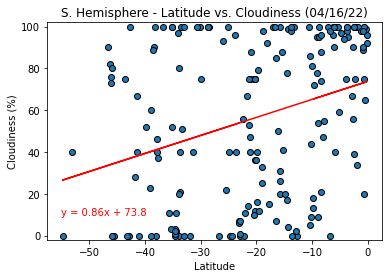

In [68]:
# Set x and y axis, restricting to southern hemisphere
x_axis = clean_city_data.loc[clean_city_data['Lat'] < 0,'Lat']
y_axis = clean_city_data.loc[clean_city_data['Lat'] < 0,'Cloudiness']

# Perform regression
(slope,intercept,rvalue,pvalue,stderr) = linregress(x_axis,y_axis)
line_eq = slope * x_axis + intercept 
line_label = f"y = {round(slope,2)}x + {round(intercept,2)}"

# Plot scatterplot and superimpose regression line
plt.scatter(x_axis,y_axis,edgecolors='black');
plt.plot(x_axis,line_eq,color='red');
plt.title('S. Hemisphere - Latitude vs. Cloudiness (04/16/22)');
plt.annotate(line_label,(-55,10),color='red');
plt.xlabel('Latitude');
plt.ylabel('Cloudiness (%)');
plt.ylim(-2,102);

# Save figure
plt.savefig('output_data/04-16-22_shemisphere_cloudiness.png')

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

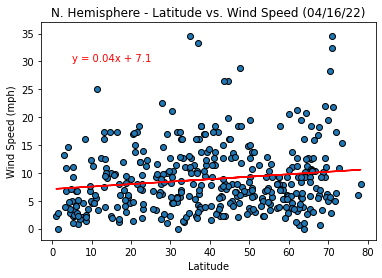

In [69]:
# Set x and y axis, restricting to northern hemisphere
x_axis = clean_city_data.loc[clean_city_data['Lat'] >= 0,'Lat']
y_axis = clean_city_data.loc[clean_city_data['Lat'] >= 0,'Wind Speed']

# Perform regression
(slope,intercept,rvalue,pvalue,stderr) = linregress(x_axis,y_axis)
line_eq = slope * x_axis + intercept 
line_label = f"y = {round(slope,2)}x + {round(intercept,2)}"

# Plot scatterplot and superimpose regression line
plt.scatter(x_axis,y_axis,edgecolors='black');
plt.plot(x_axis,line_eq,color='red');
plt.title('N. Hemisphere - Latitude vs. Wind Speed (04/16/22)');
plt.annotate(line_label,(5,30),color='red');
plt.xlabel('Latitude');
plt.ylabel('Wind Speed (mph)');
plt.ylim(-2,37);

# Save figure
plt.savefig('output_data/04-16-22_nhemisphere_wind_speed.png')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

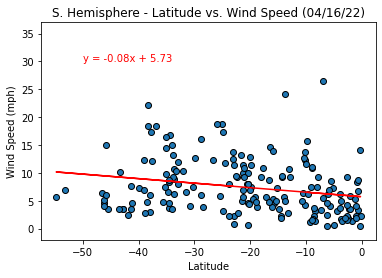

In [70]:
# Set x and y axis, restricting to southern hemisphere
x_axis = clean_city_data.loc[clean_city_data['Lat'] < 0,'Lat']
y_axis = clean_city_data.loc[clean_city_data['Lat'] < 0,'Wind Speed']

# Perform regression
(slope,intercept,rvalue,pvalue,stderr) = linregress(x_axis,y_axis)
line_eq = slope * x_axis + intercept 
line_label = f"y = {round(slope,2)}x + {round(intercept,2)}"

# Plot scatterplot and superimpose regression line
plt.scatter(x_axis,y_axis,edgecolors='black');
plt.plot(x_axis,line_eq,color='red');
plt.title('S. Hemisphere - Latitude vs. Wind Speed (04/16/22)');
plt.annotate(line_label,(-50,30),color='red');
plt.xlabel('Latitude');
plt.ylabel('Wind Speed (mph)');
plt.ylim(-2,37);

# Save figure
plt.savefig('output_data/04-16-22_shemisphere_wind_speed.png')